# **Preprocessing:**
# **Changing the txt files. Changing the different classes to just 1 unsafe class**

In [ ]:
import os

label_dir = r"C:\Users\HP\Downloads\yolo_data\all\txt"  # Change this to your label folder

for file_name in os.listdir(label_dir):
    if file_name.endswith(".txt"):
        file_path = os.path.join(label_dir, file_name)
        with open(file_path, "r") as f:
            lines = f.readlines()

        new_lines = ["0" + line[line.find(" "):] for line in lines]  # Replace all class IDs with "0"

        with open(file_path, "w") as f:
            f.writelines(new_lines)

print("All classes merged into 'unsafe' (Class 0)")


✅ All classes merged into 'unsafe' (Class 0)


# **Splitting the dataset as test,train and val**

In [ ]:
import os
import shutil
import random

# Paths
images_path = r"C:\Users\HP\Downloads\yolo_data\all\jpg"  # Folder containing images

# Define split ratios
train_ratio = 0.7  # 70% training
val_ratio = 0.2    # 20% validation
test_ratio = 0.1   # 10% testing

# Output directories
output_dirs = {
    "train": {"images": r"C:\Users\HP\Downloads\data_cnn\train\images"},
    "val": {"images": r"C:\Users\HP\Downloads\data_cnn\val\images"},
    "test": {"images": r"C:\Users\HP\Downloads\data_cnn\test\images"}
}

# Create output directories
for split in output_dirs.values():
    os.makedirs(split["images"], exist_ok=True)
    
# Get all label files (.txt)
label_files = [f for f in os.listdir(labels_path) if f.endswith(".txt")]

# Shuffle dataset
random.shuffle(label_files)

# Calculate split indexes
total_files = len(label_files)
train_idx = int(total_files * train_ratio)
val_idx = train_idx + int(total_files * val_ratio)

# Split dataset
train_files = label_files[:train_idx]
val_files = label_files[train_idx:val_idx]
test_files = label_files[val_idx:]

# Function to move files
def move_files(file_list, split_type):
    for label_file in file_list:
        label_src = os.path.join(labels_path, label_file)
        label_dest = os.path.join(output_dirs[split_type]["labels"], label_file)

        # Move label file
        shutil.copy(label_src, label_dest)

        # Move corresponding image file
        image_file = os.path.splitext(label_file)[0] + ".jpg"  # Change extension if needed
        image_src = os.path.join(images_path, image_file)
        image_dest = os.path.join(output_dirs[split_type]["images"], image_file)

        if os.path.exists(image_src):
            shutil.copy(image_src, image_dest)

# Move files into respective folders
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")


# Training the model with the custom dataset
For traing the model use this command in the cmd or bash:
yolo train model="yolov8s.pt" data="path to data.yaml" device=0 imgsz = 640 batch = 16 epochs = 50

The model is trained for 50 epochs. 			
Precision: 0.82579
Recall: 0.74356
MAP50: 0.80049
MAP50:95 : 0.59095



image 1/1 c:\Users\HP\Desktop\thumbnail.jpg: 384x640 3 unsafes, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
This thumbnail is UNSAFE!


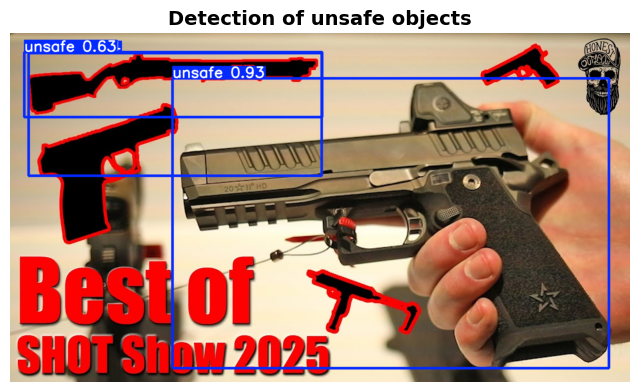

In [ ]:
import cv2
import torch
import requests
from io import BytesIO
from pytube import YouTube
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load trained YOLO model (replace 'best.pt' with your model file)
model = YOLO(r"C:\data\runs\detect\train2\weights\best.pt")  

def get_youtube_thumbnail(video_url):
    """Extracts the thumbnail URL manually from YouTube video ID."""
    video_id = video_url.split("v=")[-1].split("&")[0]  # Extract video ID
    thumbnail_url = f"https://img.youtube.com/vi/{video_id}/maxresdefault.jpg"
    
    response = requests.get(thumbnail_url)
    if response.status_code == 200:
        with open("thumbnail.jpg", "wb") as f:
            f.write(response.content)
        return "thumbnail.jpg"
    else:
        raise Exception("Failed to download thumbnail")


def predict_safety(image_path):
    """Runs YOLO on the image and predicts if it's safe/unsafe."""
    results = model(image_path)  # Run YOLO detection
    
    # Extract class names and confidence scores
    detected_classes = [model.names[int(box.cls)] for box in results[0].boxes]
    
    if "unsafe" in detected_classes:
        print("This thumbnail is UNSAFE!")
    else:
        print("This thumbnail is SAFE.")


    # Convert image for display
    image_with_boxes = results[0].plot()  # Get image with bounding boxes
    image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # ✅ Show image inline (Jupyter Notebook)
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis("off")  # Hide axis
    plt.title(f"Detection of unsafe objects", fontsize=14, fontweight="bold")
    plt.show()

# Example usage
video_url = "https://www.youtube.com/watch?v=Kr-xkfbVtk4"  # Replace with actual YouTube link
thumbnail_path = get_youtube_thumbnail(video_url)
predict_safety(thumbnail_path)
